# <u><span style="font-family: 'Times New Roman'; font-size: 60px;">PROJET DE PYTHON POUR LA DATA SCIENCE</span></u>
# <u>SUJET</u>:<span style="font-family: 'Times New Roman'; font-size: 40px;"> Modélisation prédictive de la gravité des accidents routiers en France : effets des facteurs socio-démographiques, techniques et environnementaux  </span>

## <span style="font-family: 'Times New Roman'; font-size: 40px;"><u>1. Contexte générale</u></span>  
<span style="font-family: 'Times New Roman'; font-size: 16px;"> &nbsp;&nbsp;&nbsp;&nbsp;Les accidents de la route représentent une problématique majeure de santé publique et de sécurité en France. Chaque année, malgré les nombreux progrès réalisés sur le plan de la sécurité routière(généralisations des radars automatiques, freinage automatique d'urgence, renforcement des infrastructures routières,...), des milliers de personnes sont impliquées dans des accidents, causant des blessures graves, des pertes humaines, et d'important dégâts matériels. Des disparités sont observées dans la gravité des accidents en fonction des caractéristiques des usagers, des véhicules, et des lieux où se produisent ces incidents. Les usagers de la route, par leurs comportements et leurs caractéristiques socio-démographiques (âge, sexe, rôle dans l’accident), jouent un rôle déterminant dans la survenue et la gravité des accidents. Parallèlement, les caractéristiques techniques des véhicules impliqués (type, ancienneté, nombre de passagers) influencent également l’issue des accidents. Enfin, les particularités des infrastructures routières et des zones géographiques contribuent à moduler la gravité des impacts. Dans ce contexte, il est essentiel d'analyser ces différents facteurs pour mieux comprendre leur influence sur la gravité des accidents routiers. Une telle analyse permettra d'identifier les populations et les types de véhicules les plus vulnérables, et de fournir des informations précieuses pour orienter les politiques de prévention et les initiatives visant à améliorer la sécurité routière. C'est dans ce cadre que s'inscrit ce projet. L’objectif est de dresser un portrait complet des facteurs socio-démographiques et techniques associés à la gravité des accidents, à travers des analyses descriptives et une modélisation statistique permettant de hiérarchiser ces facteurs.</span>

## 1. Présentation des bases de données et traitement des bases de données
Pour la mise en œuvre de ce projet, nous partirons de 4 base de données **caract-2023**, **usagers-2023**, **lieux-2023**, **vehicules-2023** tous disponibles et téléchargeable sur la plateforme [data.gouv](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2023/) et fournissant des données sur 54822 accidents survenus en France en 2023 pour l'année 2023. Un descriptif détaillé de chacune des variables des bases est disponible dans le fichier **Description des bases de données annuelles_2021** disponible sur ce dépôt.  
### 1.1 Présentation et traitement de la base caract-2023
La base **caract-2023** (accidents recensés entre le 1er janvier et le 31 décembre 2023) est produite et maintenue par l'Observatoire national interministériel de la sécurité routière (ONISR), en collaboration avec les forces de l’ordre (police, gendarmerie) et les services préfectoraux.  

La base **caract-2023** regroupe des informations sur les accidents, telles que :  

- **Num_Acc** : Le numéro d'identifiant unique attribué à chaque accident. Il permet de relier les différentes rubriques du fichier pour une analyse plus cohérente.  
- **jour et mois** : Ces variables indiquent respectivement le jour et le mois où l'accident a eu lieu, facilitant l'analyse temporelle des accidents.  
- **an** : L'année durant laquelle l'accident s'est produit. Cette information est essentielle pour les études longitudinales ou les tendances annuelles.  
- **hrmn** : Heure et minutes précises de l'accident, permettant de comprendre les variations horaires dans les occurrences des accidents.  
- **lum** : Les conditions d’éclairage au moment de l’accident, classifiées en cinq catégories allant de plein jour (1) à nuit avec éclairage public allumé (5).  
- **dep** : Le code INSEE du département où l'accident s'est produit. Ce code est utile pour des analyses géographiques à l’échelle départementale.  
- **com** : Le code INSEE de la commune, composé du code départemental suivi de trois chiffres, pour localiser précisément l’accident.  
- **agg** : La localisation de l'accident par rapport à l’agglomération, avec une distinction entre hors agglomération (1) et en agglomération (2).  
- **int** : La typologie de l’intersection où l'accident a eu lieu, définie par neuf catégories, notamment intersection en T (3) ou giratoire (6).  
- **atm** : Les conditions météorologiques lors de l'accident, allant de normale (1) à des phénomènes comme neige (4) ou vent fort (6).  
- **col** : Le type de collision impliquant les véhicules, tel que frontale entre deux véhicules (1), collision multiple (5) ou sans collision (7).  
- **adr** : L'adresse postale associée aux accidents survenus en agglomération, pour une localisation précise.  
- **lat et long** : Latitude et longitude correspondant à la position géographique exacte de l'accident.  

Au total, elle regroupe donc 15 variables relatives aux 54822 enregistrés.


In [1]:
import pandas as pd

# Charger les données
caract = pd.read_csv("caract-2023.csv", sep=";")

# Affichage du head avec un style simple et agréable
caract.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)



,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"



Plusieurs variables, dans le cadre de notre projet, seront pas pertinentes pour capter la gravité des accidents suivant les aspects démographiques :  
- **jour** : le jour de la semaine où s'est produit l'accident. Elle ne présente pas grand intérêt pour notre étude. 
- **an** : évidemment 2023 😁    
- **hrmn** : Heure et minutes précises de l'accident. Cette variable est très détaillée et peut introduire une complexité inutile dans l’analyse.  
- **lum** : Les conditions d’éclairage au moment de l’accident sont souvent associées à l’heure (**hrmn**) ou au type de localisation (**agg**). Cela pourrait entraîner une multicolinéarité dans notre modèle statistique. Cette variable a généralement moins d’impact direct sur la gravité des accidents que des facteurs comme la vitesse ou les caractéristiques des véhicules.   
- **int** : La typologie de l’intersection compte neuf catégories. Pour une modélisation efficace, ces catégories devraient être regroupées, ce qui nécessite un effort de transformation des données sans valeur ajoutée significative. Bien qu'elle puisse influer sur les types d’accidents, elle ne détermine pas directement leur gravité.  
- **col** : Le type de collision est utile pour comprendre comment les accidents surviennent (ex. collision multiple, sans collision), mais il est moins directement lié à la gravité.  
- **adr** : L’adresse postale précise de l’accident n’apporte pas d’information directe sur la gravité.  

Ces variables ont été exclues parce qu'elle introduisent une **complexité inutile** dans l’analyse, manquent d’un **lien direct avec la gravité des accidents** ou encore des **redondances** avec d’autres variables plus pertinentes pour ce projet.  

Nous retenons donc uniquement de cette base les variables suivantes   
*  **Num_Acc** Elle nous sera utile pour d'éventuelles concacténations et dénombrement d'accident
*  **mois** : Elle nous permettra de déterminer s'il y a des périodes de l'année où les accidents sont plus grave. 
*  **lum**: On pourra s'en servir pour déterminer une éventuelle corrélation avec la gravité de l'accident.   
*  **dep** et **com**: le numéro de département et de commune pour mieux situer les régions où les accidents les plus à risque sont susceptible de se produire  
*  **agg** :En effet en  zone urbaine, les accidents sont souvent moins graves mais plus fréquents, tandis qu'en zone rurale, la vitesse élevée et l'éloignement des secours aggravent les blessures. Cette variable permet donc de mieux comprendre les différences dans les facteurs de risque et les circonstances des accidents. 
*  **long** et **lag** : On pourra s'en servir pour une représentation géospatiale des accidents 
*  **atm** : pout les conditions atmosphérique au moment où l'accident s'est produit. On pourra s'en servi pour déterminer les conditions métérologiques les plus à risque. 
On procède donc à l'élimination du reste des variables (ou à la sélections des variables retenues pour cette base) 

In [2]:
import pandas as pd

# Variables à afficher
variables = [
    ("jour", "supprimée"),
    ("an", "supprimée"),
    ("hrmn", "supprimée"),
    ("lum", "retenue"),
    ("int", "supprimée"),
    ("col", "supprimée"),
    ("adr", "supprimée"),
    ("Num_Acc", "retenue"),
    ("mois", "retenue"),
    ("dep", "retenue"),
    ("com", "retenue"),
    ("agg", "retenue"),
    ("long", "retenue"),
    ("lat", "retenue"),
    ("atm", "retenue")
]

# Créer un DataFrame avec les noms des variables et leur statut (retenue ou supprimée)
df_variables = pd.DataFrame(variables, columns=["Variable", "Statut"])

# Fonction de stylisation pour colorier les variables
def color_variables(val):
    color = 'green' if val == "retenue" else 'red'
    return f'color: {color}'

# Appliquer le style à la colonne 'Statut' selon la valeur de "retenue" ou "supprimée"
styled_df = df_variables.style.apply(lambda x: [color_variables(i) for i in x], subset=["Statut"])

# Afficher le tableau stylisé dans Jupyter
styled_df



,Variable,Statut
0,jour,supprimée
1,an,supprimée
2,hrmn,supprimée
3,lum,retenue
4,int,supprimée
5,col,supprimée
6,adr,supprimée
7,Num_Acc,retenue
8,mois,retenue
9,dep,retenue


In [3]:
import pandas as pd

# Charger les données
caract = pd.read_csv("caract-2023.csv", sep=";")

# Sélection des colonnes
caract = caract[["Num_Acc", "mois", "lum", "dep", "atm", "com", "agg", "lat", "long"]]

# Affichage stylisé
caract.head(10).style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}        
    ]
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


,Num_Acc,mois,lum,dep,atm,com,agg,lat,long
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100"
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146"
2,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000"
3,202300000004,5,5,94,3,94078,2,"48,73248432","2,44687575"
4,202300000005,5,5,94,3,94068,2,"48,78581000","2,49217000"
5,202300000006,5,1,94,2,94058,2,"48,83717000","2,51361000"
6,202300000007,5,1,94,2,94076,2,"48,78693219","2,36756095"
7,202300000008,5,1,94,3,94011,2,"48,78238000","2,49510000"
8,202300000009,5,1,94,8,94022,2,"48,76240184","2,40690601"
9,202300000010,5,1,94,2,94079,2,"48,83266000","2,54378000"


<span style="font-family: 'Times New Roman'; font-size: 16px;"> &nbsp;&nbsp;&nbsp;&nbsp; Nous vérifions maintenant la présence d'éventuelles valeurs manquantes.  </span>

In [4]:
# Vérification des valeurs manquantes avec un affichage esthétique
missing_values = caract.isnull().any()

# Conversion en DataFrame pour un affichage amélioré
missing_df = pd.DataFrame({
    "Colonne": missing_values.index,
    "Valeurs Manquantes": missing_values.values
})

# Style pour une présentation claire et professionnelle
missing_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}
    ]
).apply(
    lambda x: ['background-color: lightcoral;' if v else 'background-color: lightgreen;' for v in x],
    subset=['Valeurs Manquantes']
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


,Colonne,Valeurs Manquantes
0,Num_Acc,False
1,mois,False
2,lum,False
3,dep,False
4,atm,False
5,com,False
6,agg,False
7,lat,False
8,long,False


<span style="font-family: 'Times New Roman'; font-size: 16px;"> &nbsp;&nbsp;&nbsp;&nbsp;La base retenue ne comporte donc pas de valaurs manquantes. Passons maintenant à la base vehicules-2023. </span>

## 1.2 Présentation et traitement de la base vehicules-2023
### Variables présentes dans la  base
La base de données **vehicules-2023** fournit des informations détaillées sur les caractéristiques des véhicules impliqués dans des accidents corporels, permettant d'explorer les spécificités techniques des véhicules ainsi que des éléments liés au contexte de l'accident. Les variables présentes dans cette base sont les suivantes : 
- ****Num_Acc**** : Identifiant unique de l’accident, utilisé pour relier les véhicules impliqués à l'accident correspondant décrit dans les autres rubriques.
- ****id_vehicule**** : Identifiant numérique unique attribué à chaque véhicule impliqué dans un accident, incluant les piétons associés aux véhicules impliqués.
- ****Num_Veh**** : Identifiant alphanumérique du véhicule, pouvant être utilisé comme alternative à **id_vehicule** pour associer les véhicules aux usagers et accidents.
- ****senc**** : Indique le sens de circulation du véhicule, avec des options comme :
  - Numéro croissant de point kilométrique (1),
  - Décroissant (2),
  - Absence de repère (3).
- ****catv**** : Catégorie du véhicule impliqué dans l’accident. Les catégories incluent :
  - Bicyclette (01),
  - Scooter (30),
  - Autobus (37),
  - Train (39),
  - Véhicules non motorisés comme les engins de déplacement personnel (60).  
  Cette variable est cruciale pour analyser l'impact des types de véhicules sur la sécurité routière.
- ****obs**** : Type d’obstacle fixe heurté par le véhicule lors de l'accident. Exemples :
  - Véhicules en stationnement (1),
  - Arbres (2),
  - Glissières métalliques (3-4),
  - Bâtiments, poteaux ou trottoirs (6-15),
  - Sortie de chaussée sans obstacle (16).
- ****obsm**** : Type d’obstacle mobile heurté, comme :
  - Piéton (1),
  - Autre véhicule (2),
  - Animal domestique (5) ou sauvage (6),
  - Autres obstacles mobiles (9).
- ****choc**** : Point de choc initial du véhicule, comme :
  - Avant (1),
  - Côtés (7-8),
  - Arrière (4),
  - Tonneaux ou chocs multiples (9).
- ****manv**** : Manoeuvre principale effectuée par le véhicule avant l’accident. Exemples :
  - Changement de file (11-14),
  - Dépassement (17-18),
  - Demi-tour (10),
  - Stationnement (20),
  - Évitement (21).
- ****motor**** : Type de motorisation du véhicule impliqué :
  - Hydrocarbures (1),
  - Hybride électrique (2),
  - Électrique (3),
  - Hydrogène (4),
  - Motorisation humaine (5).
- ****occutc**** : Nombre d'occupants dans un véhicule de transport en commun au moment de l’accident. Variable cruciale pour les analyses concernant les transports collectifs.



In [5]:
import pandas as pd

# Charger les données
vehicules = pd.read_csv("vehicules-2023.csv", sep=";")

# Affichage du head avec un style simple et agréable
vehicules.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,nan
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,nan
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,nan
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,nan
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,nan


### Variables exclues et justifications
* **senc** (Sens de circulation)
Bien que le sens de circulation soit important pour comprendre les circonstances de l'accident, il n'a pas de lien direct avec la gravité des blessures ou des dégâts matériels. Le type de collision (**col**) ou les caractéristiques de localisation (variables géographiques) capturent déjà ces effets, notamment pour les accidents frontaux.

* **choc** (Point de choc initial)
Le point de choc influence les dommages subis par le véhicule, mais il ne reflète pas nécessairement la gravité des blessures pour les passagers. Inclure cette variable nécessiterait un regroupement ou une transformation des catégories pour éviter un excès de granularité, sans garantie de valeur ajoutée.

* **manv** (Manoeuvre principale)
Les nombreuses catégories de cette variable rendent son intégration dans une modélisation statistique complexe et peu pertinente pour expliquer la gravité. Les circonstances des manoeuvres sont souvent corrélées avec des variables comme le type de collision (**col**) ou les conditions météorologiques (**atm**). 

* **occutc** (Nombre d'occupant dans le vehicule au moment de l'accident)
Cette variable pourrait présenter un intérêt particulier pour notre étude puisqu'on pourrait soupçonner que la gravité d'un accident est lié au nombre d'occupant du véhicule. Mais la première visualisation faite de la base laisse soupconner la présente de plusieurs valeurs manqauantes pour cette base. 



In [6]:
# Calcul du nombre de valeurs manquantes et du pourcentage pour la variable 'occutc'
missing_values = vehicules['occutc'].isnull().sum()
missing_percentage = (missing_values / len(vehicules)) * 100

# Création d'un tableau récapitulatif spécifique à la variable 'occutc'
summary_table = pd.DataFrame({
    'Variable': ['occutc'],
    'Valeurs Manquantes': [missing_values],
    'Pourcentage des Observations': [f"{missing_percentage:.2f}%"]
})

# Affichage du tableau
from IPython.display import display
display(summary_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('text-align', 'center'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]}
]).set_caption("📊 Résumé des Valeurs Manquantes pour la Variable 'occutc'"))


,Variable,Valeurs Manquantes,Pourcentage des Observations
0,occutc,92747,99.10%


Nos soupcons étaient donc justifier. Nous excluons donc aussi la variable **occutc**

Seul les variables suivantes sont donc retenues pour notre études : 
* L'identifiant de l’accident **Num_Acc** , **id_vehicule** et l'identifiant **num_veh**
* **catv** :  On pourra s'en servir pour déterminer le type de véhicule susceptible d'avoir impliqué dans les accidents les plus à risque. 
* **motor** :utile pour voir s'il y a des types de vehicules susceptibles de causer des dégâts plus graves en cas d'accidents 
On procède donc à l'extraction de cette des variables 

In [7]:
import pandas as pd

# Charger les données des véhicules (exemple)
vehicules = pd.read_csv("vehicules-2023.csv", sep=";")

# Sélectionner les colonnes spécifiques
vehicules = vehicules[["Num_Acc", "id_vehicule", "num_veh", "catv", "motor"]]

# Affichage esthétique
vehicules.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_vehicule,num_veh,catv,motor
0,202300000001,155 680 557,A01,30,1
1,202300000002,155 680 556,A01,7,1
2,202300000003,155 680 554,B01,2,1
3,202300000003,155 680 555,A01,7,1
4,202300000004,155 680 551,B01,7,4


<span style="font-family: 'Times New Roman'; font-size: 16px;">&nbsp;&nbsp;&nbsp;&nbsp;On vérifie maintenant la présence d'éventuelles valeurs manquantes </span>

In [8]:
# Vérification des valeurs manquantes avec un affichage esthétique
missing_values = vehicules.isnull().any()

# Conversion en DataFrame pour un affichage amélioré
missing_df = pd.DataFrame({
    "Colonne": missing_values.index,
    "Valeurs Manquantes": missing_values.values
})

# Style pour une présentation claire et professionnelle
missing_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}
    ]
).apply(
    lambda x: ['background-color: lightcoral;' if v else 'background-color: lightgreen;' for v in x],
    subset=['Valeurs Manquantes']
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)

,Colonne,Valeurs Manquantes
0,Num_Acc,False
1,id_vehicule,False
2,num_veh,False
3,catv,False
4,motor,False


On n'a donc pas de valeurs manquantes dans cette base. Passons maintenant à la base **usagers-2023**. 
## 1.3 Présentation et traitement de la base usagers-2023  
### Variables présentes dans la  base
La base de données **usagers-2023** couvre l’ensemble des **accidents corporels** survenus en France métropolitaine et dans les départements d’outre-mer (DOM) durant l’année 2023. Elle fournit un ensemble d'informations sur tous les usagers impliqués dans des accidents déclarés par les forces de l’ordre.  
Chaque ligne correspond à un usager (conducteur, passager, ou piéton) et contient les informations suivantes :  
- **Num_Acc** : Identifiant unique de l’accident, permettant de relier les usagers à un accident particulier décrit dans d'autres rubriques.  
- **id_usager** : Code unique attribué à chaque usager impliqué dans l'accident, incluant les piétons heurtés.  
- **id_vehicule** : Identifiant numérique du véhicule associé à l’usager.  
- **num_Veh** : Identifiant alphanumérique du véhicule, utilisé pour établir les correspondances entre véhicules et usagers.  
- **place** : Position occupée par l’usager dans le véhicule (conducteur, passager avant, passager arrière).  
- **catu** : Catégorie de l’usager (conducteur, passager, ou piéton).  
- **grav** : Gravité des blessures (indemne, tué, blessé hospitalisé, blessé léger).  
- **sexe** : Sexe de l'usager (masculin ou féminin).  
- **An_nais** : Année de naissance de l’usager, permettant de calculer son âge au moment de l’accident.  
- **trajet** : Motif du déplacement (domicile-travail, courses, usage professionnel, promenade).  
- **secu1, secu2, secu3** : Indications sur l’utilisation d’équipements de sécurité (ceinture, casque, gants, etc.).  
- **locp** : Localisation du piéton au moment de l’accident (trottoir, passage piéton, chaussée, etc.).  
- **actp** : Action du piéton au moment de l’accident (se déplacer, traverser, être masqué).  
- **etatp** : État du piéton (seul, accompagné, ou en groupe).  


In [9]:
import pandas as pd

# Charger les données
usagers = pd.read_csv("usagers-2023.csv", sep=";")

# Affichage du head avec un style simple et agréable
usagers.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightgreen'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.000000,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.000000,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.000000,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.000000,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.000000,0,1,0,0,0,0,-1


 
## Variables exclues et justification
Comme dans le cas de la base caracteristique 2023, plusieurs variables seront exclues de l'analyse. Voici ceux qui pour des raisons de redondances ou complexités inutiles sont enlever:
* **locp** : Localisation du piéton au moment de l'accident  
Il ne concerne que les piétons, rendant son utilisation limitée dans une analyse globale.  

* **actp** : Action du piéton au moment de l'accident  
Spécifique aux piétons, donc peu pertinente pour une analyse impliquant différents types d’usagers. L'interprétation est subjective pouvant varier selon les rapports des forces de l’ordre.   

* **etatp** : État du piéton au moment de l'accident  
Elle est Limité aux piétons, réduisant son intérêt pour une analyse globale et l’état du piéton (seul ou en groupe) a une influence négligeable sur la gravité des accidents. 

* **trajet** : Motif du déplacement de l’usager  
Le trajet est pertinent pour analyser les contextes, mais peu lié à la gravité des accidents. Il est redondant avec des données démographiques (âge, catégorie socioprofessionnelle).     

* **catu** : Catégorie de l’usager impliqué  
Redondante avec d’autres variables plus détaillées (**place**, **trajet**) avec une contribution indirecte à l’analyse de la gravité, car les facteurs techniques et environnementaux prédominent. 
 

Seules les variables suivantes seront donc retenues de cette base : 
* l'identifiant de l'accident **Num_Acc** de la base caract-2023, l'identifiant unique de l’usager **id_usager**, l'identifiant unique du véhicule **id_vehicule** repris pour chacun des usagers occupant le vehicule et l'identifiant du véhicule (Num_Veh)repris pour chacun des usagers occupant ce véhicule  
* le sexe **sexe** pour déterminer éventuellement disparité de la gravité au sein du genre </span>
* **place** : On pourra s'en servir pour déterminer si le fait d'être assis à une place ou une autre vous expose plus à de plus grave blessures ou pas.  
*  l'année de naissance **an_nais**. On s'en servira pour déterminer l'age des usager impliqué dans les accidents ayant eu lieu et si une tranche d'age est plus exposée aux accidents graves ou non. </span> 
* **secu1**, **secu2**, **secu3**: Pour vérifier si l'utilisation de dispositif de sécurité réduit effectivement la gravité de l'accidents. 
* la gravité des blessures **grav** qui nous permettra de mesurer la gravité de l'accident    
Nous procédons maintenant à l'extraction de ces variables 


In [10]:
import pandas as pd

# Définir les variables de la base de données
variables_total = [
    "locp", "actp", "etatp", "trajet", "catu", 
    "Num_Acc", "id_usager", "id_vehicule", "Num_Veh", 
    "sexe", "place", "an_nais", "secu1", "secu2", "secu3", "grav"
]

# Variables retenues et supprimées selon l'analyse
variables_retenues = [
    "Num_Acc", "id_usager", "id_vehicule", "Num_Veh", 
    "sexe", "place", "an_nais", "secu1", "secu2", "secu3", "grav"
]
variables_supprimees = [
    "locp", "actp", "etatp", "trajet", "catu"
]

# Créer un DataFrame pour afficher le tableau
data = {
    "Variable": variables_total,
    "Statut": ["Retenue" if var in variables_retenues else "Supprimée" for var in variables_total]
}

df = pd.DataFrame(data)

# Appliquer un style esthétique au tableau en utilisant map
styled_df = df.style.apply(lambda x: ['background-color: lightgreen' if status == 'Retenue' else 'background-color: lightcoral' for status in x], subset=['Statut']) \
                   .set_table_styles([{
                       'selector': 'thead th',
                       'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]
                   }, {
                       'selector': 'tbody tr:nth-child(odd)',
                       'props': [('background-color', '#f9f9f9')]
                   }, {
                       'selector': 'tbody tr:nth-child(even)',
                       'props': [('background-color', 'white')]
                   }])

# Afficher le tableau avec un style
styled_df


,Variable,Statut
0,locp,Supprimée
1,actp,Supprimée
2,etatp,Supprimée
3,trajet,Supprimée
4,catu,Supprimée
5,Num_Acc,Retenue
6,id_usager,Retenue
7,id_vehicule,Retenue
8,Num_Veh,Retenue
9,sexe,Retenue


In [11]:
import pandas as pd

# Charger les données
usagers = pd.read_csv("usagers-2023.csv", sep=";")

# Sélectionner les colonnes pertinentes
usagers = usagers[['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh','grav','place', 'sexe', 'an_nais','secu1', 'secu2', 'secu3']]

# Affichage du head avec un style simple et agréable
usagers.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightgreen'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_usager,id_vehicule,num_veh,grav,place,sexe,an_nais,secu1,secu2,secu3
0,202300000001,203 851 184,155 680 557,A01,4,1,1,1978.000000,2,0,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,2,1997.000000,1,0,-1
2,202300000002,203 851 183,155 680 556,A01,3,10,1,1997.000000,0,-1,-1
3,202300000003,203 851 180,155 680 554,B01,3,1,1,1987.000000,2,6,0
4,202300000003,203 851 181,155 680 555,A01,1,1,2,1984.000000,1,0,0


<span style="font-family: 'Times New Roman'; font-size: 16px;"> &nbsp;&nbsp;&nbsp;&nbsp; Passons à la vérifications de valeurs manquantes </span>

In [12]:
import pandas as pd

# Charger les données
usagers = pd.read_csv("usagers-2023.csv", sep=";")

# Vérification des valeurs manquantes
missing_values = usagers.isnull().any()

# Conversion en DataFrame pour un affichage amélioré
missing_df = pd.DataFrame({
    "Colonne": missing_values.index,
    "Valeurs Manquantes": missing_values.values
})

# Style pour une présentation claire et professionnelle
missing_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}
    ]
).apply(
    lambda x: ['background-color: lightcoral;' if v else 'background-color: lightgreen;' for v in x],
    subset=['Valeurs Manquantes']
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


,Colonne,Valeurs Manquantes
0,Num_Acc,False
1,id_usager,False
2,id_vehicule,False
3,num_veh,False
4,place,False
5,catu,False
6,grav,False
7,sexe,False
8,an_nais,True
9,trajet,False


<span style="font-family: 'Times New Roman'; font-size: 16px;"> &nbsp;&nbsp;&nbsp;&nbsp; On a donc présence de valeurs manquantes pour la variable année de naissance (**an_nais**) </span> 

In [13]:
import pandas as pd

# Calcul du nombre de valeurs manquantes pour la colonne "an_nais"
n = usagers["an_nais"].isnull().sum()

# Calcul du pourcentage de valeurs manquantes
missing_percentage = (n * 100) / len(usagers)

# Créer un DataFrame pour afficher les résultats sous forme de tableau
missing_values_df = pd.DataFrame({
    "Colonne": ["an_nais"],
    "Valeurs Manquantes": [n],
    "Pourcentage Manquants (%)": [missing_percentage]
})

# Application de styles pour améliorer la présentation du tableau
missing_values_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#D5DBDB'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#F2F2F2')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]},
    ]
).set_properties(
    **{'font-size': '12pt', 'text-align': 'center'}
)


,Colonne,Valeurs Manquantes,Pourcentage Manquants (%)
0,an_nais,2598,2.065363


Cette proportion étant très faible, on peut supprimer les observations correspondantes de notre base

In [14]:
usagers=usagers.dropna()

Les trois bases de données étant maintenant prête, nous pouvons procéder à leur fusion en utilisant la clé **Num_Acc** faciliter nos analyses. 

In [15]:
#Fusion des trois bases
data = pd.merge(caract,usagers, on='Num_Acc', how='inner')
data=pd.merge(data,vehicules,on='id_vehicule',how="inner")
data=data.dropna()
# Affichage de l'échantillon de données après la fusion et le nettoyage
print("Affichage des premières lignes de la base de données après fusion et nettoyage :")

# Affichage de la dimension de la DataFrame
print(f"\nDimensions de la base de données après fusion : {data.shape[0]} lignes, {data.shape[1]} colonnes\n")

# Affichage des 5 premières lignes de la DataFrame avec un joli format
data.head().style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]},
    ]
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


Affichage des premières lignes de la base de données après fusion et nettoyage :

Dimensions de la base de données après fusion : 123191 lignes, 28 colonnes



,Num_Acc_x,mois,lum,dep,atm,com,agg,lat,long,id_usager,id_vehicule,num_veh_x,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,Num_Acc_y,num_veh_y,catv,motor
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100",203 851 184,155 680 557,A01,1,1,4,1,1978.000000,5,2,0,-1,-1,-1,-1,202300000001,A01,30,1
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 182,155 680 556,A01,1,1,1,2,1997.000000,9,1,0,-1,-1,-1,-1,202300000002,A01,7,1
2,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 183,155 680 556,A01,10,3,3,1,1997.000000,9,0,-1,-1,2,3,1,202300000002,A01,7,1
3,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 180,155 680 554,B01,1,1,3,1,1987.000000,0,2,6,0,0,0,-1,202300000003,B01,2,1
4,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 181,155 680 555,A01,1,1,1,2,1984.000000,0,1,0,0,0,0,-1,202300000003,A01,7,1


## Verification de présence d'éventuelles valeurs manquantes

In [28]:
# Vérification des valeurs manquantes dans chaque colonne
missing_values = data.isnull().any()

# Affichage sous forme de DataFrame pour un affichage plus lisible
missing_df = pd.DataFrame(missing_values).reset_index()
missing_df.columns = ['Colonne', 'Valeurs Manquantes']

# Appliquer un style simple pour rendre l'affichage plus agréable
missing_df.style.set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
).hide(axis="index")


Colonne,Valeurs Manquantes
Num_Acc_x,False
mois,False
lum,False
dep,False
atm,False
com,False
agg,False
lat,False
long,False
id_usager,False


On peut remarquer que les clés utilisées pour la fusion se sont répétés. On procède donc à la suppression des doublons. 

In [17]:
data.drop(columns=["num_veh_y","Num_Acc_y"])

,Num_Acc_x,mois,lum,dep,atm,com,agg,lat,long,id_usager,...,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,catv,motor
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100",203 851 184,...,1978.0,5,2,0,-1,-1,-1,-1,30,1
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 182,...,1997.0,9,1,0,-1,-1,-1,-1,7,1
2,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 183,...,1997.0,9,0,-1,-1,2,3,1,7,1
3,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 180,...,1987.0,0,2,6,0,0,0,-1,2,1
4,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 181,...,1984.0,0,1,0,0,0,0,-1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123186,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 720,...,1971.0,1,2,0,-1,0,0,-1,30,1
123187,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 721,...,1968.0,1,1,0,-1,0,0,-1,7,1
123188,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 717,...,2003.0,2,1,-1,-1,-1,-1,-1,7,1
123189,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 718,...,2002.0,1,1,-1,-1,-1,-1,-1,7,1


### Vérification de présence de doublons dans la base

In [29]:
# Vérification de présence de doublons
duplicates = data.duplicated()

# Compter le nombre de doublons
num_duplicates = duplicates.sum()

# Créer un DataFrame pour l'affichage des doublons
duplicates_df = pd.DataFrame({
    'Doublon Présent': [num_duplicates > 0],
    'Nombre de Doublons': [num_duplicates]
})

# Appliquer un style pour rendre l'affichage plus esthétique
duplicates_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#4CAF50'),
                                           ('color', 'white'),
                                           ('font-weight', 'bold'),
                                           ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#e2f7e2')]}
    ]
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt', 'text-align': 'center'}
)


,Doublon Présent,Nombre de Doublons
0,False,0


Nous n'avons donc pas de doublons dans la base.

L’âge étant  directement interprétable en tant que facteur socio-démographique, la variable an_nais sera transformé en une variable catégorielle **age** pour des analyses plus pertinentes

In [19]:
#Calcul des ages
data["an_nais"]=2023-data["an_nais"]
data=data.rename({"an_nais":"age"},axis=1)
# Changement du type de la variable age en int
data['age']=data["age"].astype(int)


In [20]:
data

,Num_Acc_x,mois,lum,dep,atm,com,agg,lat,long,id_usager,...,secu1,secu2,secu3,locp,actp,etatp,Num_Acc_y,num_veh_y,catv,motor
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100",203 851 184,...,2,0,-1,-1,-1,-1,202300000001,A01,30,1
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 182,...,1,0,-1,-1,-1,-1,202300000002,A01,7,1
2,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 183,...,0,-1,-1,2,3,1,202300000002,A01,7,1
3,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 180,...,2,6,0,0,0,-1,202300000003,B01,2,1
4,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 181,...,1,0,0,0,0,-1,202300000003,A01,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123186,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 720,...,2,0,-1,0,0,-1,202300054821,A01,30,1
123187,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 721,...,1,0,-1,0,0,-1,202300054821,B01,7,1
123188,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 717,...,1,-1,-1,-1,-1,-1,202300054822,A01,7,1
123189,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 718,...,1,-1,-1,-1,-1,-1,202300054822,A01,7,1


In [21]:
#Calcul du min et du max
print("Le plus jeune individu de cette base a ",data["age"].min()," et le plus âgé a ",data['age'].max())

Le plus jeune individu de cette base a  0  et le plus âgé a  110


Ainsi l'individu le plus âgé impliqué dans un accident en 2023 avait 110 ans au moment de l'accident. Que cherchait un individu de 110 en pleine circulation ? Que cherchait il dans un véhicule? Ces questions laissent penser à la présence d'outlayers pour la variable age. On procédera donc dans la suite à des tests pour la détections d'éventuelles outlayers  

Nombre d'outliers supprimés avec IsolationForest : 1208


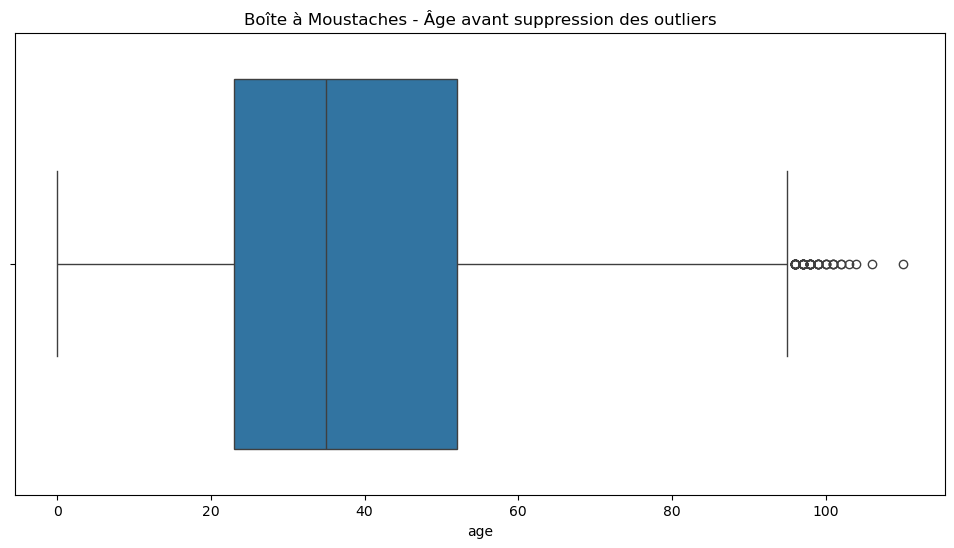

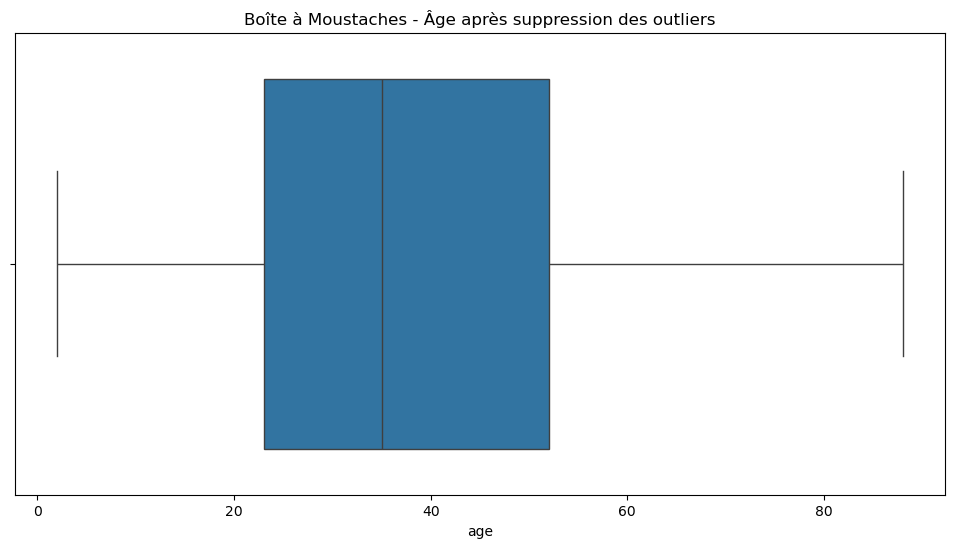

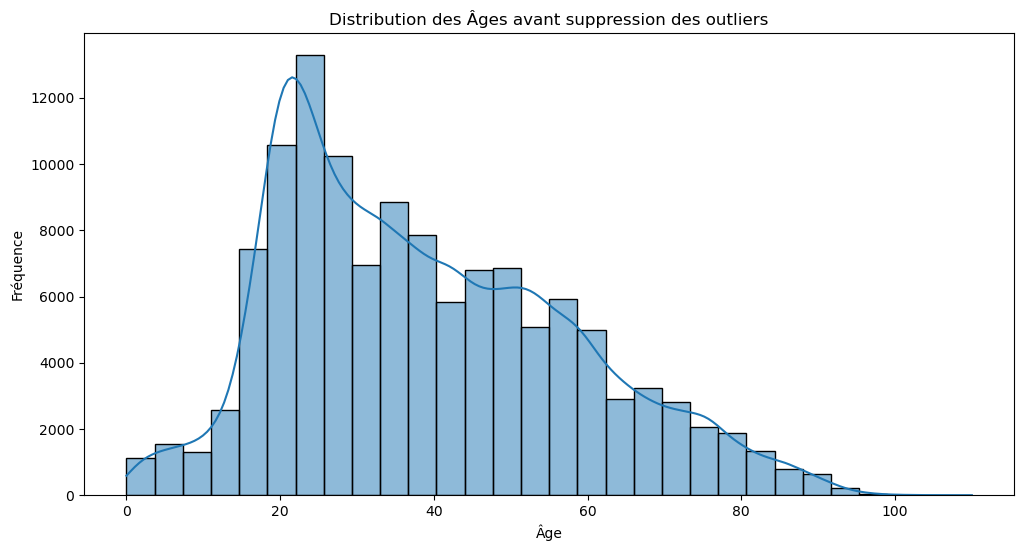

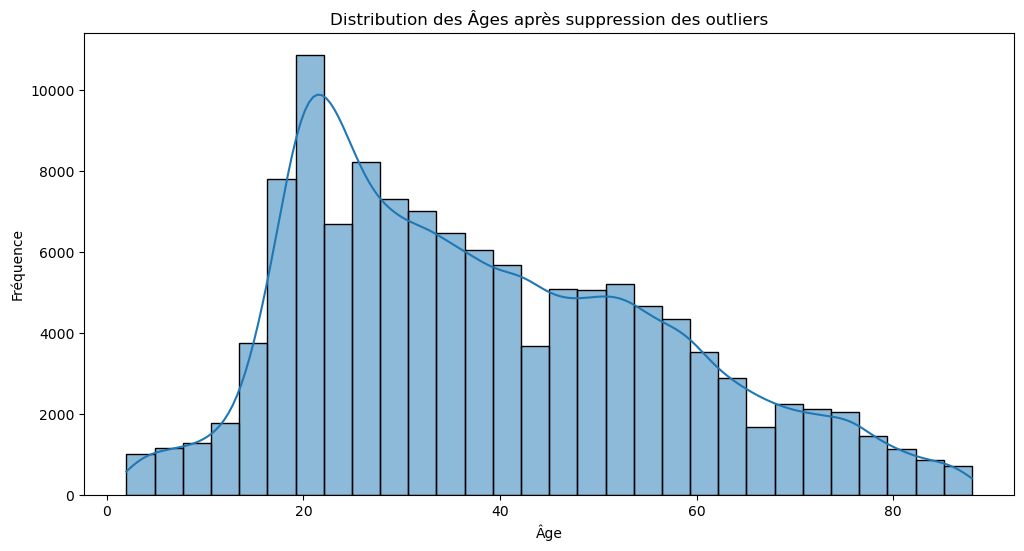

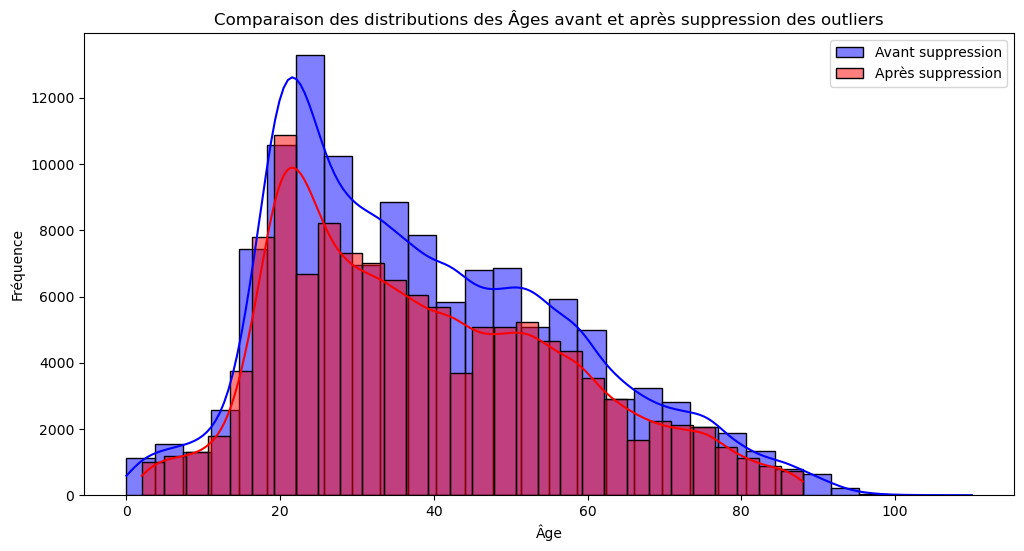

In [22]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# 1. Appliquer IsolationForest pour détecter les outliers dans la variable 'age'
model = IsolationForest(contamination=0.01)  # contamination = proportion d'outliers attendus
data['outlier'] = model.fit_predict(data[['age']])

# 2. 'outlier' va valoir 1 pour les données normales et -1 pour les outliers
# Supprimer les outliers
data_no_outliers_iforest = data[data['outlier'] == 1]

# 3. Afficher le nombre d'outliers supprimés
outliers_count = data.shape[0] - data_no_outliers_iforest.shape[0]
print(f"Nombre d'outliers supprimés avec IsolationForest : {outliers_count}")

# 4. Visualiser les données avec boîte à moustaches avant suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['age'])
plt.title("Boîte à Moustaches - Âge avant suppression des outliers")
plt.show()

# 5. Visualiser les données avec boîte à moustaches après suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_no_outliers_iforest['age'])
plt.title("Boîte à Moustaches - Âge après suppression des outliers")
plt.show()

# 6. Distribution (Histogramme) avant suppression des outliers
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title("Distribution des Âges avant suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# 7. Distribution (Histogramme) après suppression des outliers
plt.figure(figsize=(12, 6))
sns.histplot(data_no_outliers_iforest['age'], kde=True, bins=30)
plt.title("Distribution des Âges après suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# 8. Comparaison des distributions avant et après suppression des outliers
plt.figure(figsize=(12, 6))

# Avant suppression des outliers
sns.histplot(data['age'], kde=True, color='blue', label='Avant suppression', bins=30)

# Après suppression des outliers
sns.histplot(data_no_outliers_iforest['age'], kde=True, color='red', label='Après suppression', bins=30)

plt.title("Comparaison des distributions des Âges avant et après suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

data = data.drop(columns=['outlier'])

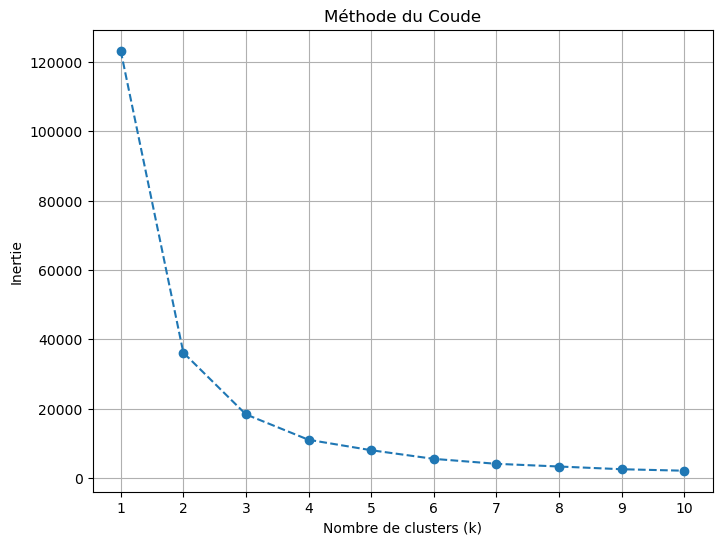

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Étape 2: Sélectionner la colonne 'age' pour appliquer le KMeans
age_data = data[["age"]]

# Étape 3: Normalisation de la variable 'age' (c'est souvent une bonne pratique pour KMeans)
scaler = StandardScaler()
age_data_scaled = scaler.fit_transform(age_data)

# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []  # Liste pour stocker les valeurs d'inertie

# Tester différentes valeurs de k (par exemple de 1 à 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(age_data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



Nous choisissons comme nombre de clusters k=4. A justifier ??????????????? 

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Exemple de chargement des données (assurez-vous que votre base "data" est déjà chargée)
# data = pd.read_csv("votre_fichier.csv")  # Remplacez par votre fichier réel

# On suppose que la variable 'age' est dans la base de données
age_data = data[['age']]

# Définir le nombre de clusters (à ajuster selon vos besoins)
n_clusters = 4

# Appliquer le K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(age_data)

# Ordonner les classes selon la moyenne des âges
cluster_order = (
    data.groupby('cluster')['age']
    .mean()
    .sort_values()
    .index
    .tolist()
)

# Mapper les clusters pour qu'ils soient ordonnés par âges croissants
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_order)}
data['age_class'] = data['cluster'].map(cluster_mapping)+1

# Supprimer l'ancienne colonne de cluster si non nécessaire
data = data.drop(columns=['cluster'])

# Calculer la distribution des observations par classe
distribution = data['age_class'].value_counts().sort_index()

# Afficher la distribution sous forme de tableau statistique

stat_summary = data.groupby('age_class')['age'].describe()

# Afficher le résumé statistique
print("Résumé statistique par classe :")
print(stat_summary)




Résumé statistique par classe :
             count       mean       std   min   25%   50%   75%    max
age_class                                                             
1          45618.0  19.994980  6.006547   0.0  17.0  21.0  24.0   28.0
2          35430.0  36.496190  4.875807  29.0  32.0  36.0  41.0   45.0
3          28238.0  54.148665  5.251658  46.0  50.0  54.0  58.0   64.0
4          13905.0  74.732902  7.322683  65.0  69.0  74.0  79.0  110.0


In [25]:
#Suppression de la variable age
del data['age']
data

,Num_Acc_x,mois,lum,dep,atm,com,agg,lat,long,id_usager,...,secu2,secu3,locp,actp,etatp,Num_Acc_y,num_veh_y,catv,motor,age_class
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100",203 851 184,...,0,-1,-1,-1,-1,202300000001,A01,30,1,2
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 182,...,0,-1,-1,-1,-1,202300000002,A01,7,1,1
2,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 183,...,-1,-1,2,3,1,202300000002,A01,7,1,1
3,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 180,...,6,0,0,0,-1,202300000003,B01,2,1,2
4,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 181,...,0,0,0,0,-1,202300000003,A01,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123186,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 720,...,0,-1,0,0,-1,202300054821,A01,30,1,3
123187,202300054821,10,1,973,1,97302,1,"4,89713000","-52,32854000",203 720 721,...,0,-1,0,0,-1,202300054821,B01,7,1,3
123188,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 717,...,-1,-1,-1,-1,-1,202300054822,A01,7,1,1
123189,202300054822,10,1,69,6,69387,2,"45,73306000","4,82540000",203 720 718,...,-1,-1,-1,-1,-1,202300054822,A01,7,1,1


## **2. Analyse descriptive de la base de données**

In [26]:
print(data.columns)


Index(['Num_Acc_x', 'mois', 'lum', 'dep', 'atm', 'com', 'agg', 'lat', 'long',
       'id_usager', 'id_vehicule', 'num_veh_x', 'place', 'catu', 'grav',
       'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp',
       'Num_Acc_y', 'num_veh_y', 'catv', 'motor', 'age_class'],
      dtype='object')
